DOMAIN: Electronics and Telecommunication

DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Deep Learing Dataset/Signal.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.isna().sum()/len(df)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(keep ='first',inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
sns.pairplot(df,hue  = 'Signal_Strength',palette='Set2')

Output hidden; open in https://colab.research.google.com to view.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<Axes: xlabel='Signal_Strength', ylabel='count'>

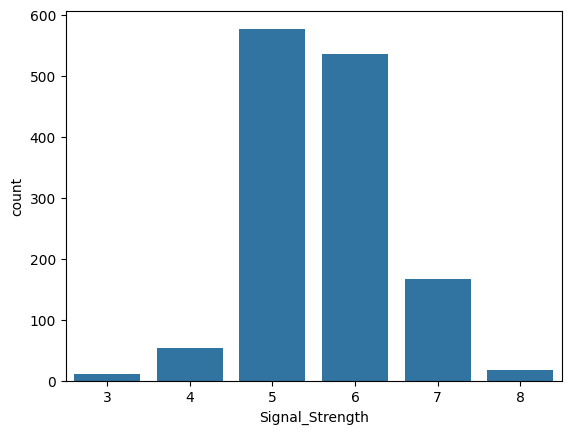

In [12]:
sns.countplot(data = df,x = 'Signal_Strength')

<Axes: >

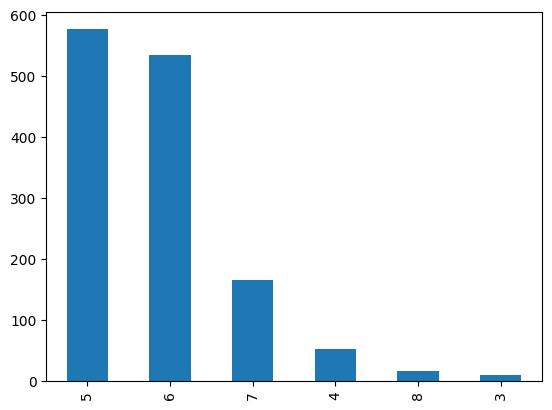

In [13]:
df['Signal_Strength'].value_counts().plot(kind = "bar")

In [14]:
X = df.drop("Signal_Strength",axis  = 1)
y = df['Signal_Strength']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(951, 11)
(951,)
(408, 11)
(408,)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_train.shape,X_test.shape)

(951, 11) (408, 11)


In [22]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [23]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [24]:
print(y_train.shape)
print(y_test.shape)

(951, 9)
(408, 9)


In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout

In [26]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(11, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())

NN_model.add(Dense(9,activation='relu'))

NN_model.add(Dense(9,activation='relu'))
# The Output Layer :
NN_model.add(Dense(9,activation='softmax'))  # except softmax

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
Total params: 464 (1.81 KB)
Trainable params: 442 (1.73 KB)
Non-trainable params: 22 (88.00 Byte)
________________________

In [27]:
NN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model_train = NN_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 4s 14ms/step - loss: 2.0416 - accuracy: 0.1283 - val_loss: 2.0704 - val_accuracy: 0.3652
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 1.8479 - accuracy: 0.2355 - val_loss: 1.9611 - val_accuracy: 0.4583
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 1.6771 - accuracy: 0.3544 - val_loss: 1.8309 - val_accuracy: 0.5147
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 1.5067 - accuracy: 0.4553 - val_loss: 1.6835 - val_accuracy: 0.5343
Epoch 5/100
30/30 [==============================] - 0s 6ms/step - loss: 1.3523 - accuracy: 0.5310 - val_loss: 1.5315 - val_accuracy: 0.5319
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 1.2323 - accuracy: 0.5510 - val_loss: 1.3984 - val_accuracy: 0.5098
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 1.1513 - accuracy: 0.5752 - val_loss: 1.2827 - val_accuracy: 0.5515
Epoch 8/100


In [ ]:
loss_train = NN_model.history.history['loss']
loss_val = NN_model.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Acc_train = NN_model.history.history['accuracy']
Acc_val = NN_model.history.history['val_accuracy']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()